In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("FireData.csv", parse_dates=True)

In [3]:
data.groupby("neighborhood").count()

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,,,
Allegheny Center,62,62,61,62,62,62,61,62,61,62,62,62,62,62,62,62,59,59
Allegheny West,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,42,42
Allentown,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,123,123
Arlington,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
Arlington Heights,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
West End,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
West Oakland,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62


In [8]:
sortedData = data["neighborhood"].value_counts()
sortedData

Carrick                      289
Central Business District    274
South Side Flats             270
Squirrel Hill South          256
Hazelwood                    249
                            ... 
Ridgemont                     12
Mt. Oliver                    12
East Carnegie                 11
Regent Square                  9
Mount Oliver Borough           6
Name: neighborhood, Length: 91, dtype: int64

In [17]:
mostFires = sortedData.head()
leastFires = sortedData.tail()

In [18]:
mostFires

Carrick                      289
Central Business District    274
South Side Flats             270
Squirrel Hill South          256
Hazelwood                    249
Name: neighborhood, dtype: int64

In [19]:
leastFires

Ridgemont               12
Mt. Oliver              12
East Carnegie           11
Regent Square            9
Mount Oliver Borough     6
Name: neighborhood, dtype: int64

In [20]:
df = pd.DataFrame(sortedData)

In [21]:
df.head

<bound method NDFrame.head of                            neighborhood
Carrick                             289
Central Business District           274
South Side Flats                    270
Squirrel Hill South                 256
Hazelwood                           249
...                                 ...
Ridgemont                            12
Mt. Oliver                           12
East Carnegie                        11
Regent Square                         9
Mount Oliver Borough                  6

[91 rows x 1 columns]>

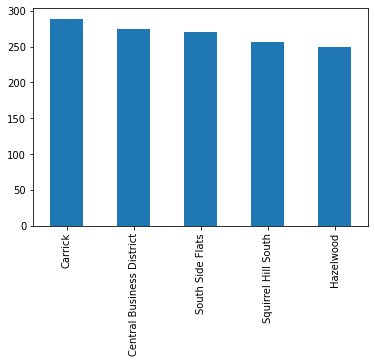

In [25]:
pd.Series(mostFires).plot.bar()

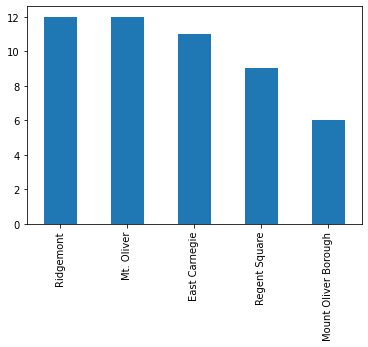

In [26]:
pd.Series(leastFires).plot.bar()